# Hyperparameter Optimization mit hyperas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from hyperopt import Trials, STATUS_OK, tpe

from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

from hyperas import optim
from hyperas.distributions import choice, uniform

Using TensorFlow backend.


### Data preparation

In [2]:
def data():
    news = pd.read_csv('../data/mixed_news/news_dataset.csv')
    news = news.dropna(subset=['title','content'])
    news = news[news.content != ' ']
    news = news[news.title != ' ']
    with h5py.File('encoded_data/title_encode.h5', 'r') as hf:
        title_encode = hf['title_encode'][:]
    title_NN = pd.DataFrame(data = title_encode)
    x_train, x_test, y_train, y_test = train_test_split(title_NN,news.label, test_size=0.33, stratify=news.label,
                                                        random_state=42)
    LE = LabelEncoder()
    LE.fit(["fake","real"])
    y_train = LE.transform(y_train)
    y_test = LE.transform(y_test)
    return x_train, y_train, x_test, y_test

## Model creation

In [3]:
def create_model(x_train, y_train, x_test, y_test):
    dim = x_train.shape[1]
    model = Sequential()
    model.add(Dense({{choice([768,2*768,4*768])}}, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense({{choice([int(0.1*768), int(0.5*768), 768])}}))
        model.add(Dropout(0.5))
        
    model.add(Dense({{choice([10, 256, 512])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(1))
    model.add(Activation({{choice(['sigmoid','softmax'])}}))

    model.compile(loss='binary_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

    result = model.fit(x_train, y_train,
              batch_size={{choice([64, 128])}},
              epochs=10,
              verbose=2,
              validation_split=0.3,
              callbacks=[early_stop])
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

## Optimization with hyperopt
Algorithm: Tree of Parzen Estimators

In [4]:
trials = Trials()
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=50,
                                      trials=trials,
                                     notebook_name='Hyperopt')
X_train, Y_train, X_test, Y_test = data()
print("Best performing model chosen hyper-parameters:")
print(best_run)
best_model.save('../model/best_Hyperopt_NN_Bert.hdf5')

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import h5py
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.metrics import roc_curve, auc
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, LeakyReLU, Activation
except:
    pass

try:
    from keras.callbacks import TensorBoard, ModelCheckpoint
except:
    pass

try:
    from keras.models import load_model
except:
    pass

try:
    from sklearn.metrics import confusion_matrix, classification_report
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from sklearn.preprocessing import LabelEncoder
except:
    pass

try:
    from keras.callbacks i

 - 8s - loss: 0.4587 - acc: 0.7768 - val_loss: 0.4847 - val_acc: 0.7712          

Epoch 4/10                                                                       
 - 8s - loss: 0.4336 - acc: 0.7923 - val_loss: 0.4653 - val_acc: 0.7794          

Epoch 5/10                                                                       
 - 8s - loss: 0.4094 - acc: 0.8073 - val_loss: 0.4526 - val_acc: 0.7827          

Epoch 6/10                                                                       
 - 9s - loss: 0.3821 - acc: 0.8217 - val_loss: 0.4612 - val_acc: 0.7859          

Epoch 7/10                                                                       
 - 9s - loss: 0.3610 - acc: 0.8345 - val_loss: 0.4565 - val_acc: 0.7966          

Epoch 8/10                                                                       
 - 9s - loss: 0.3366 - acc: 0.8492 - val_loss: 0.5019 - val_acc: 0.7607          

Epoch 9/10                                                                       
 - 9s - lo

 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694       

Epoch 5/10                                                                    
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694       

Epoch 6/10                                                                    
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694       

Epoch 00006: early stopping                                                   
Best validation acc of epoch:                                                 
0.569414703527746                                                             
Train on 13074 samples, validate on 5604 samples                              
Epoch 1/10                                                                    
 - 10s - loss: 0.7184 - acc: 0.6007 - val_loss: 0.5620 - val_acc: 0.6902      

Epoch 2/10                                                                    
 - 8s - loss: 0.5852 - acc: 0.7002 - val_loss: 0

 - 3s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 2/10                                                                     
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 3/10                                                                     
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 4/10                                                                     
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 5/10                                                                     
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 6/10                                                                     
 - 2s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694        

Epoch 00006: early stopping                                                    
Best validation acc of epoch:     

 - 15s - loss: 0.3988 - acc: 0.8106 - val_loss: 0.4545 - val_acc: 0.7939       

Epoch 9/10                                                                     
 - 15s - loss: 0.3817 - acc: 0.8208 - val_loss: 0.4738 - val_acc: 0.7910       

Epoch 10/10                                                                    
 - 14s - loss: 0.3639 - acc: 0.8325 - val_loss: 0.5696 - val_acc: 0.7534       

Best validation acc of epoch:                                                  
0.7938972164868118                                                             
Train on 13074 samples, validate on 5604 samples                               
Epoch 1/10                                                                     
 - 17s - loss: 0.5766 - acc: 0.6987 - val_loss: 0.4811 - val_acc: 0.7607       

Epoch 2/10                                                                     
 - 15s - loss: 0.4711 - acc: 0.7721 - val_loss: 0.4518 - val_acc: 0.7771       

Epoch 3/10                         

Epoch 4/10                                                                     
 - 6s - loss: 0.4355 - acc: 0.7929 - val_loss: 0.4809 - val_acc: 0.7761        

Epoch 5/10                                                                     
 - 6s - loss: 0.3958 - acc: 0.8201 - val_loss: 0.4944 - val_acc: 0.7816        

Epoch 6/10                                                                     
 - 6s - loss: 0.3677 - acc: 0.8323 - val_loss: 0.4704 - val_acc: 0.7941        

Epoch 7/10                                                                     
 - 6s - loss: 0.3299 - acc: 0.8548 - val_loss: 0.4847 - val_acc: 0.7914        

Epoch 8/10                                                                     
 - 6s - loss: 0.3035 - acc: 0.8694 - val_loss: 0.4892 - val_acc: 0.7976        

Epoch 9/10                                                                     
 - 6s - loss: 0.2646 - acc: 0.8866 - val_loss: 0.5004 - val_acc: 0.7921        

Epoch 10/10                       

 - 7s - loss: 0.2830 - acc: 0.8740 - val_loss: 0.5106 - val_acc: 0.7810        

Epoch 9/10                                                                     
 - 7s - loss: 0.2530 - acc: 0.8889 - val_loss: 0.5363 - val_acc: 0.7980        

Epoch 00009: early stopping                                                    
Best validation acc of epoch:                                                  
0.7980014274241157                                                             
Train on 13074 samples, validate on 5604 samples                               
Epoch 1/10                                                                     
 - 7s - loss: 0.6892 - acc: 0.5565 - val_loss: 0.6625 - val_acc: 0.6420        

Epoch 2/10                                                                     
 - 5s - loss: 0.6651 - acc: 0.5952 - val_loss: 0.6331 - val_acc: 0.6836        

Epoch 3/10                                                                     
 - 5s - loss: 0.6343 - acc: 0.6416 -

 - 9s - loss: 0.6970 - acc: 0.6123 - val_loss: 0.5413 - val_acc: 0.7216        

Epoch 2/10                                                                     
 - 7s - loss: 0.5863 - acc: 0.6911 - val_loss: 0.5274 - val_acc: 0.7330        

Epoch 3/10                                                                     
 - 6s - loss: 0.5471 - acc: 0.7269 - val_loss: 0.5012 - val_acc: 0.7595        

Epoch 4/10                                                                     
 - 6s - loss: 0.5273 - acc: 0.7354 - val_loss: 0.4806 - val_acc: 0.7653        

Epoch 5/10                                                                     
 - 6s - loss: 0.5084 - acc: 0.7470 - val_loss: 0.4869 - val_acc: 0.7580        

Epoch 6/10                                                                     
 - 6s - loss: 0.4959 - acc: 0.7580 - val_loss: 0.4740 - val_acc: 0.7714        

Epoch 7/10                                                                     
 - 6s - loss: 0.4854 - acc: 0.7660

Epoch 6/10                                                                     
 - 9s - loss: 0.3883 - acc: 0.8151 - val_loss: 0.4828 - val_acc: 0.7932        

Epoch 7/10                                                                     
 - 9s - loss: 0.3638 - acc: 0.8261 - val_loss: 0.4851 - val_acc: 0.7775        

Epoch 8/10                                                                     
 - 9s - loss: 0.3384 - acc: 0.8463 - val_loss: 0.5044 - val_acc: 0.7923        

Epoch 9/10                                                                     
 - 9s - loss: 0.3159 - acc: 0.8559 - val_loss: 0.5356 - val_acc: 0.7862        

Epoch 00009: early stopping                                                    
Best validation acc of epoch:                                                  
0.793183440229537                                                              
Train on 13074 samples, validate on 5604 samples                               
Epoch 1/10                          

 - 6s - loss: 0.4680 - acc: 0.7539 - val_loss: 0.4770 - val_acc: 0.7682        

Epoch 8/10                                                                     
 - 6s - loss: 0.4566 - acc: 0.7767 - val_loss: 0.5056 - val_acc: 0.7812        

Epoch 9/10                                                                     
 - 6s - loss: 0.4441 - acc: 0.7782 - val_loss: 0.4869 - val_acc: 0.7562        

Epoch 10/10                                                                    
 - 6s - loss: 0.4293 - acc: 0.7914 - val_loss: 0.4778 - val_acc: 0.7853        

Best validation acc of epoch:                                                  
0.785331905951762                                                              
Train on 13074 samples, validate on 5604 samples                               
Epoch 1/10                                                                     
 - 24s - loss: 6.9969 - acc: 0.5611 - val_loss: 6.8646 - val_acc: 0.5694       

Epoch 2/10                         

0.5694147039531896                                                             
Train on 13074 samples, validate on 5604 samples                               
Epoch 1/10                                                                     
 - 9s - loss: 0.6712 - acc: 0.5866 - val_loss: 0.6431 - val_acc: 0.6055        

Epoch 2/10                                                                     
 - 5s - loss: 0.6261 - acc: 0.6616 - val_loss: 0.6035 - val_acc: 0.7018        

Epoch 3/10                                                                     
 - 5s - loss: 0.5957 - acc: 0.6879 - val_loss: 0.5786 - val_acc: 0.7134        

Epoch 4/10                                                                     
 - 5s - loss: 0.5702 - acc: 0.7111 - val_loss: 0.5572 - val_acc: 0.7209        

Epoch 5/10                                                                     
 - 5s - loss: 0.5533 - acc: 0.7200 - val_loss: 0.5415 - val_acc: 0.7270        

Epoch 6/10                         

## Evaluation of best model

9201/9201 [==============================] - 3s 300us/step
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      4016
           1       0.85      0.75      0.79      5185

   micro avg       0.78      0.78      0.78      9201
   macro avg       0.78      0.79      0.78      9201
weighted avg       0.79      0.78      0.78      9201

[[3305  711]
 [1297 3888]]


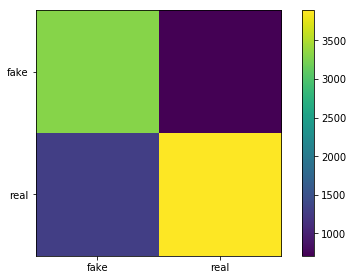

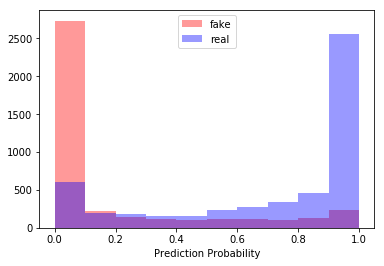

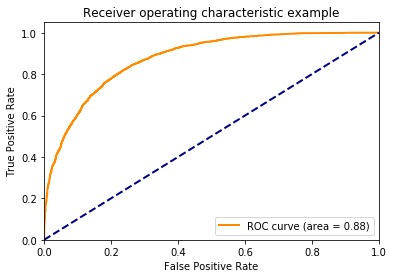

In [5]:
y_pred = best_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.round(y_pred)
print(classification_report(Y_test, y_pred_bool))
print(confusion_matrix(Y_test, y_pred_bool,
                       labels=[0,1]))
plt.imshow(confusion_matrix(Y_test, y_pred_bool,
                            labels=[0,1]))
plt.tight_layout()
plt.colorbar()
plt.xticks(range(2), ["fake", "real"])
plt.yticks(range(2), ["fake", "real"])
plt.show()
plt.savefig("../build/plots/Bert/cnfsn_mtx_Hyperopt_bert_title_nn.pdf")
plt.close()

plt.hist(y_pred[Y_test == 0],label="fake", alpha = 0.4, color = "r")
plt.hist(y_pred[Y_test == 1],label = "real",alpha = 0.4, color = "b")
plt.xlabel("Prediction Probability")
plt.legend()
plt.show()
plt.savefig("../build/plots/Bert/prob_Hyperopt_bert_title_nn.pdf")
plt.close()

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.savefig("../build/plots/Bert/roc_Hyperopt_bert_title_nn.pdf")
plt.close()

In [6]:
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': -0.6836188432576399,
   'status': 'ok',
   'model': <keras.engine.sequential.Sequential at 0x7f5ff8621d30>},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'Activation': [0],
    'Activation_1': [0],
    'Dense': [0],
    'Dense_1': [0],
    'Dense_2': [0],
    'Dropout': [0],
    'Dropout_1': [0],
    'Dropout_2': [0],
    'batch_size': [0],
    'optimizer': [0]},
   'vals': {'Activation': [1],
    'Activation_1': [0],
    'Dense': [2],
    'Dense_1': [2],
    'Dense_2': [1],
    'Dropout': [0.7342146978592597],
    'Dropout_1': [1],
    'Dropout_2': [0.6517968154887782],
    'batch_size': [1],
    'optimizer': [2]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2019, 6, 29, 6, 22, 4, 582000),
  'refresh_time': datetime.datetime(2019, 6, 29, 6, 24, 9, 594000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'loss': -0.

In [9]:
best_model.get_config()

{'name': 'sequential_25',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_88',
    'trainable': True,
    'batch_input_shape': (None, 768),
    'dtype': 'float32',
    'units': 1536,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation_73',
    'trainable': True,
    'activation': 'relu'}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_64',
    'trainable': True,
    'rate': 0.41830392331704863,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_89',
    'trainabl